### 載入工具

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### 資料：訓練集、標籤集

[-2.37565464 -4.61175641] [1. 1.]
[-2.40087819 -1.17599438] [1. 0.]
[0.69346593 2.07638048] [0. 1.]
[4.72555052 3.67579578] [0. 0.]


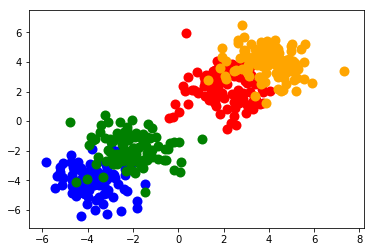

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(-4*n_data, 1)     # class0 x shape=(100, 2)
x1 = np.random.normal(-2*n_data, 1)     # class1 x shape=(100, 2)
x2 = np.random.normal(2*n_data, 1)      # class0 x shape=(100, 2)
x3 = np.random.normal(4*n_data, 1)      # class1 x shape=(100, 2)
y0 = np.zeros((100, 2))                 # class0 y shape=(100, 2)
y0[:,:] = 1  
y1 = np.zeros((100, 2))                 # class1 y shape=(100, 2)
y1[:,0] = 1 
y2 = np.zeros((100, 2))                 # class2 y shape=(100, 2)
y2[:,1] = 1 
y3 = np.zeros((100, 2))                 # class3 y shape=(100, 2)
x_train = np.vstack((x0, x1, x2, x3))   # shape (400, 2) + some noise
y_train = np.vstack((y0, y1, y2, y3))   # shape (400, 2)

print(x_train[0], y_train[0])
print(x_train[100], y_train[100])
print(x_train[200], y_train[200])
print(x_train[-1], y_train[-1])

colors = ['b','g','r','orange']
for i in range(y_train.shape[0]):
    c_index = 0
    if (y_train[i, 0] > 0.5 and y_train[i, 1] > 0.5):
        c_index = 0
    elif (y_train[i, 0] >= 0.5 and y_train[i, 1] <= 0.5):
        c_index = 1
    elif (y_train[i, 0] <= 0.5 and y_train[i, 1] > 0.5):
        c_index = 2
    elif (y_train[i, 0] <= 0.5 and y_train[i, 1] <= 0.5):
        c_index = 3
    plt.scatter(x_train[i, 0], x_train[i, 1], c=colors[c_index], s=100, lw=0, cmap='RdYlGn')
plt.show()

### 建構 Tensorflow 的 Graph

In [3]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 2])

layer1 = tf.layers.dense(x, 20, tf.nn.relu)
hypothesis = tf.layers.dense(layer1, 2)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=hypothesis))
hypothesis = tf.nn.sigmoid(hypothesis)
# cost = tf.reduce_mean(tf.losses.log_loss(y, hypothesis)) # cross entropy

train = tf.train.GradientDescentOptimizer(learning_rate=0.03).minimize(cost)

predict = tf.cast(tf.greater_equal(hypothesis, 0.5), tf.float32)
correct = tf.cast(tf.equal(predict, y), tf.float32)
accuracy = tf.reduce_mean(tf.reduce_min(correct, 1))

### 建 Session、初始變數、開始訓練

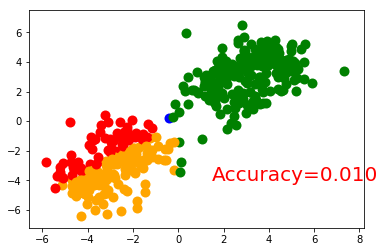

step 0 accuracy 0.01 cost 1.0714602


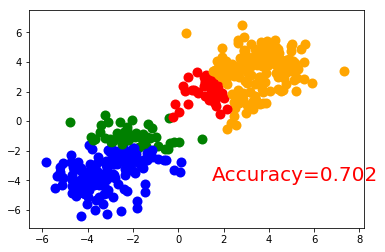

step 1000 accuracy 0.7025 cost 0.28363279


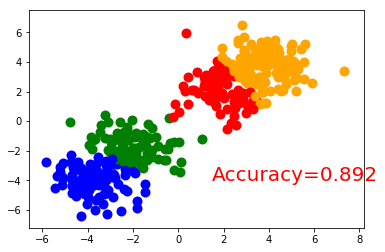

step 2000 accuracy 0.8925 cost 0.1970616


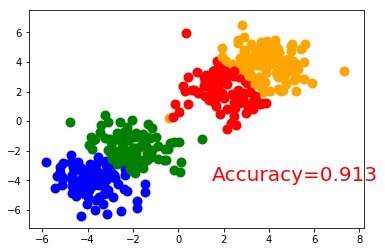

step 3000 accuracy 0.9125 cost 0.14175397


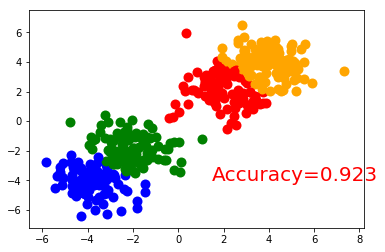

step 4000 accuracy 0.9225 cost 0.1202314


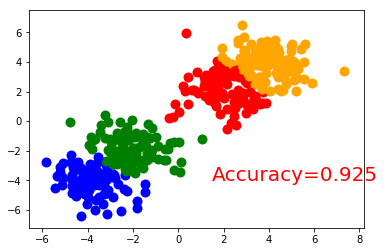

step 5000 accuracy 0.925 cost 0.11132743


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5001):
    p_, a_, c_, _ = sess.run([hypothesis, accuracy, cost, train], feed_dict={x:x_train, y:y_train})
    if step%1000 == 0:
        plt.cla()
        for i in range(len(p_)):
            c_index = 0
            if (p_[i, 0] > 0.5 and p_[i, 1] > 0.5):
                c_index = 0
            elif (p_[i, 0] > 0.5 and p_[i, 1] <= 0.5):
                c_index = 1
            elif (p_[i, 0] <= 0.5 and p_[i, 1] > 0.5):
                c_index = 2
            elif (p_[i, 0] <= 0.5 and p_[i, 1] <= 0.5):
                c_index = 3
            plt.scatter(x_train[i, 0], x_train[i, 1], c=colors[c_index], s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.3f' % a_, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        print('step', step, 'accuracy', a_, 'cost', c_)
plt.show()

### 預測新資料

[[0.98249465 0.02205115]]


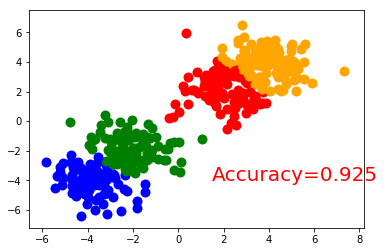

In [5]:
x_new = np.array([[-1, -1]])
print(sess.run(hypothesis, feed_dict={x:x_new}))

for i in range(len(p_)):
            c_index = 0
            if (p_[i, 0] > 0.5 and p_[i, 1] > 0.5):
                c_index = 0
            elif (p_[i, 0] > 0.5 and p_[i, 1] <= 0.5):
                c_index = 1
            elif (p_[i, 0] <= 0.5 and p_[i, 1] > 0.5):
                c_index = 2
            elif (p_[i, 0] <= 0.5 and p_[i, 1] <= 0.5):
                c_index = 3
            plt.scatter(x_train[i, 0], x_train[i, 1], c=colors[c_index], s=100, lw=0, cmap='RdYlGn')
plt.text(1.5, -4, 'Accuracy=%.3f' % a_, fontdict={'size': 20, 'color': 'red'})
plt.show()